In [1]:
library(corrplot)

corrplot 0.92 loaded



### Data

The UD GUM corpus, train + dev (https://corpling.uis.georgetown.edu/gum/download.html)

### Model

`bert-base-cased`

### Probing method

Correlational analysis of the activation patterns in the pooler output: embedding of the CLS token in the last layer of the BERT model fed into an additional two-layer MLP.

In [2]:
gum.all <- read.csv('../csv/mbert_vanilla_GUM_roots_ff_train_dev_3.csv', h = F)
dim(gum.all)

[1] 6507  768

In [3]:
gum.sentences <- scan('GUM_sentences.txt', sep='\n', what='character')
length(gum.sentences)

[1] 6507

In [5]:
# We can what the activations in the pooler output
# correlate with in domain of lexicon, dependency relations,
# and individual lexical items.

gum.binary.deprel <- read.csv('GUM_binary_deprels.csv')
# Exclude the root, which is found everywhere
gum.binary.deprel <- gum.binary.deprel[, -which(colnames(gum.binary.deprel) == 'root')]
gum.binary.pos    <- read.csv('GUM_binary_POS.csv')
gum.binary.words  <- read.csv('GUM_binary_words.csv')

In [6]:
gum.pooler.cor.deprel <- cor(gum.all, gum.binary.deprel)
gum.pooler.cor.pos <- cor(gum.all, gum.binary.pos)
gum.pooler.cor.words <- cor(gum.all, gum.binary.words)

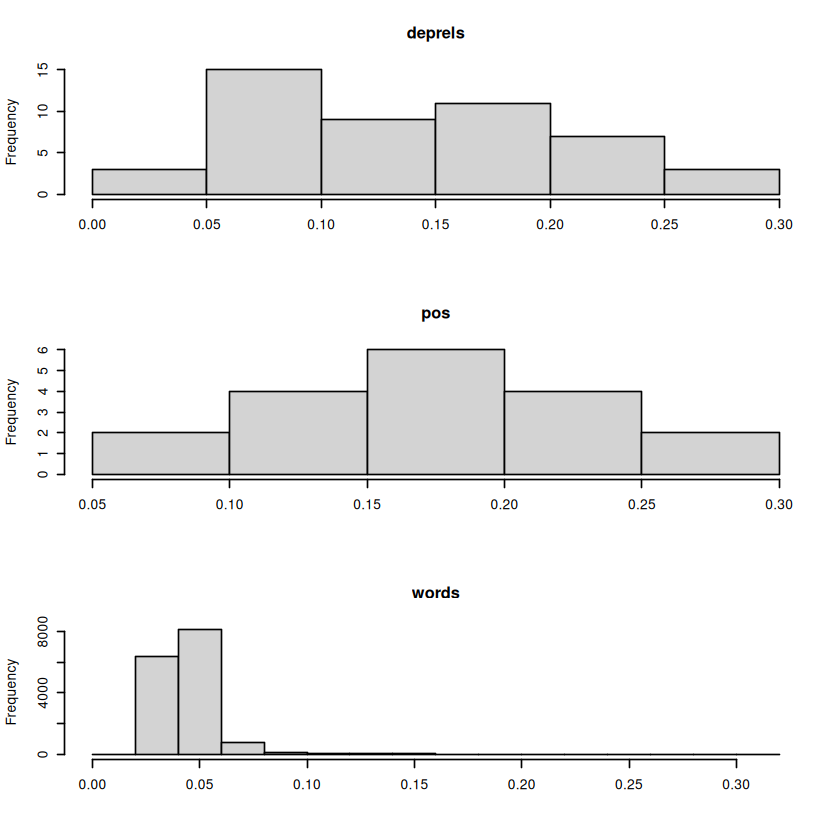

In [7]:
# Histogram of maximum (in absolute values) correlations
# for each deprel, POS, and word resp
par(mfrow=c(3,1))
hist(apply(abs(gum.pooler.cor.deprel), 2, max), xlab='', main='deprels')
hist(apply(abs(gum.pooler.cor.pos), 2, max), xlab='', main='pos')
hist(apply(abs(gum.pooler.cor.words), 2, max), xlab='', main='words')

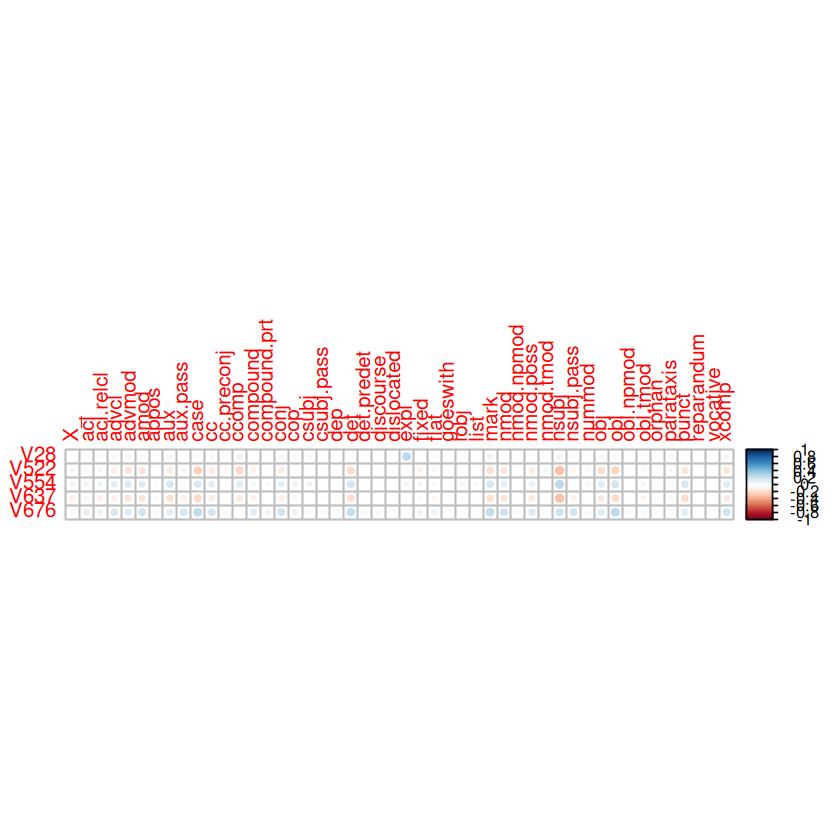

In [8]:
# Corrplots showing the strongest correlations between activations
# and different features of sentences
prominent.neurons.deprels <- which(apply(abs(gum.pooler.cor.deprel), 1, max) > 0.25)
corrplot(gum.pooler.cor.deprel[prominent.neurons.deprels,])

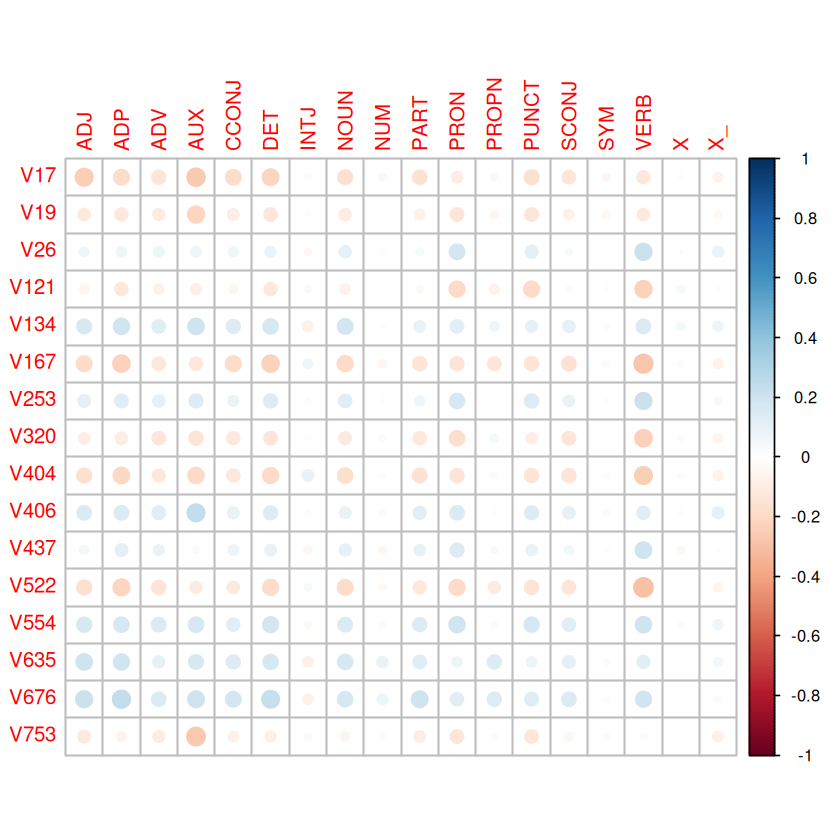

In [10]:
prominent.neurons.pos <- which(apply(abs(gum.pooler.cor.pos), 1, max) > 0.2)
corrplot(gum.pooler.cor.pos[prominent.neurons.pos,])

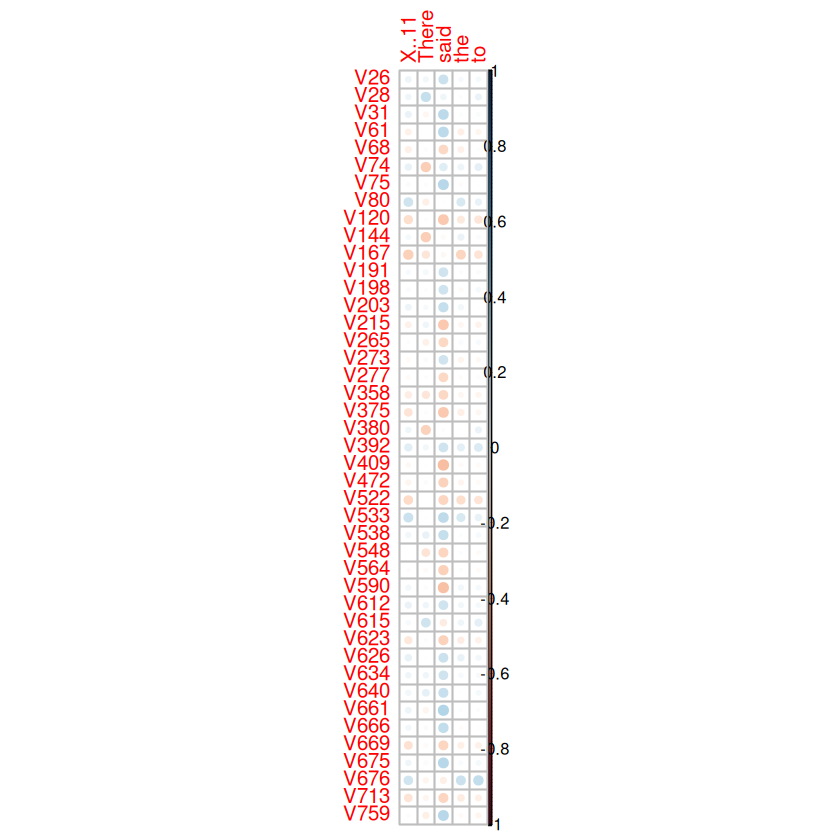

In [11]:
# Some neurons react to function words.
prominent.words <- which(apply(abs(gum.pooler.cor.words), 2, max) > 0.2)
prominent.neurons.words <- which(apply(abs(gum.pooler.cor.words[,prominent.words]), 1, max) > 0.2)
corrplot(gum.pooler.cor.words[prominent.neurons.words,prominent.words])

In [4]:
gum.pooler.pca <- prcomp(gum.all)

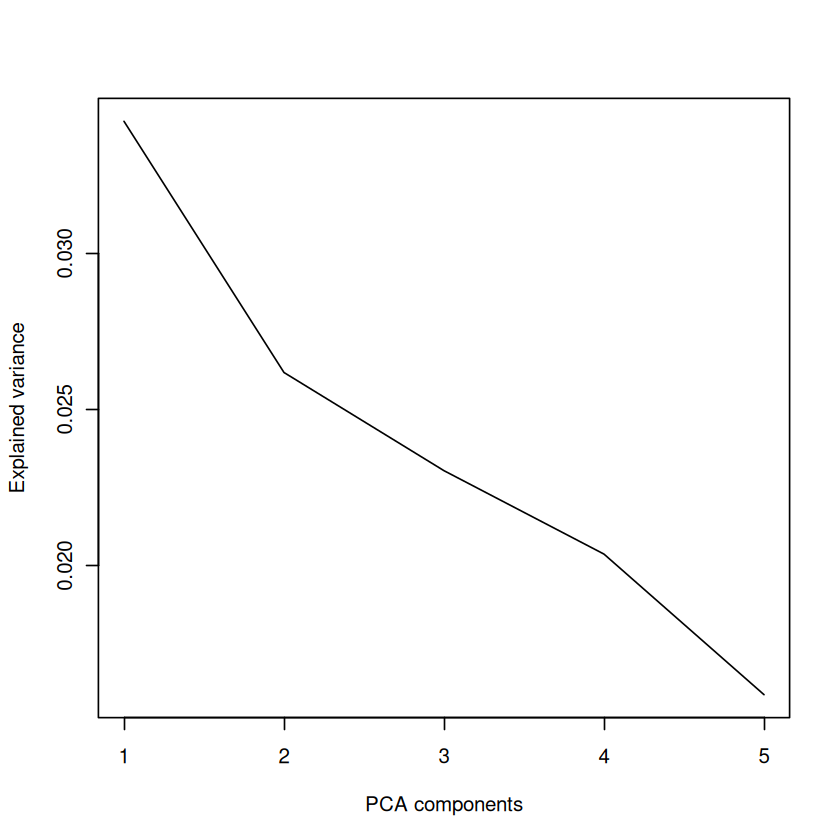

In [5]:
# Pooler activations are higly correlated:
# more than half of variation is contained inside
# a single component.
var_explained = gum.pooler.pca$sdev^2 / sum(gum.pooler.pca$sdev^2)
plot(var_explained[1:5] ~ seq_along(var_explained[1:5]), type='l', 
     xlab='PCA components',
     ylab='Explained variance')

In [6]:
var_explained[1]

[1] 0.03423439

In [7]:
sum(var_explained[1:3])

[1] 0.08346499

In [14]:
# What stands behind this? Let's extract sentences with biggest 
# and lowest activations for the first three components

In [15]:
show.sentences <- function(sentences, sep='\n\n') {
    for (s in sentences) {
        cat(s); cat(sep)
    }
}

### First principal component

Minimum values: have

In [16]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,1], index.return=T)$ix, n=50)], '\n\n')

We have two chairs where we can sit down and sort of enjoy the weather when it is a little bit better , um but now it 's really cold so just gon na close it .

We have no way to estimate how many times we 've served it overall , but we 're now pouring around ten a night .

Do they have a general sense of ' coolness ? '

I have high confidence in our medical professionals .

We have a strong public health system .

They have a warm local atmosphere and taste great .

They have lunch and siesta , then go back to work for a few hours in the late afternoon .

Overalls have more pockets than pants .

I have no idea what it says , but I think they 're cough drops , so if anybody knows what this says let me know .

You have many names to choose from .

" I have no doubt that as time goes on , there will be more and more cases documented "

I also have a profile they fill out for me , a mini-MMPI that I developed , so that I have an idea -- Rebecca and I put it together

I have no idea .

You 

Maximum values: ???

In [17]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,1], index.return=T)$ix, n=20)])

On Thursday , with 110 days until the start of the 2014 Winter Paralympics in Sochi , Russia , Wikinews interviewed Assistant Professor in Educational Leadership , Sport Studies and Educational / Counseling Psychology at Washington State University Simon Ličen about attitudes in United States towards the Paralympics .

In 24 games , Holt batted .292 with a triple and 3 RBI .

The Chatnam Islands ( Rekohu in the indigenous Moriori language ) are the eastern-most settled islands in New Zealand .

If you 're signed up for a class , check with your instructor to find out if there is a dress code at the school .

The ultimate result of workers who can focus on their preferences and talents , learn to do their specialized jobs better , and work in larger organizations is that society as a whole can produce and consume far more than if each person tried to produce all of his or her own goods and services .

Large-scale agriculture and the resultant abundance of food allowed time for people to

### Second principal component

Minimum values: quotes + verb of speech

In [18]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,2], index.return=T)$ix, n=40)])

" My father , he 's an anthropologist , " she said .

" What happened ? Did your dog eat it ? " he said , making a joke .

" Because Earth had lost touch with your world , the people here are very interesting to my father , " she said .

" I need to pay for a damaged book , " she said .

" Yes , " she said , and smiled .

" He wanted to be rich and famous and he made lots of choices to go that way " , Wilkins said .

Do you think your parents will like me ? " he said .

" My family came here from Earth , " she said .

Jeff Rathke , the State Department Spokesperson , said , " We urge the governments of the region to work together quickly , first and foremost , to save the lives of migrants now at sea who are in need of an immediate rescue effort " .

With tears in her eyes she said , " Thank you , Mets Poet , thank you . "

" My father will like you , " she said .

" Had it happened an hour later it would have been much worse , " Khaled Al-Maeena , editor at large at the Saudi Gazette 

Maximum values: incomplete sentences

In [19]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,2], index.return=T)$ix, n=20)])

In the morning , brilliant sunlight scoured the walls and the floor , and the traveler and her pack were gone .

Bruna Anastacio brunaanastacio@hotmail.com Universidade Federal de Santa Catarin

Spread the heavy items over a few boxes .

Abstract .

Squashed em down .

Tips .

Understand the hypnotic effect .

Entreat assistance .

Spread out quinoa evenly and cover baking dish completely with aluminum foil .

Insights from Eye-Tracking

Shoo !

Cognitive psychologists strive to determine and measure different types of intelligence , why some people are better at problem solving than others , and how emotional intelligence affects success in the workplace , among countless other topics .

Distinguish concepts and prototypes

The doctor swabs her upper arm with antiseptic and says , “ I ’m going to give you something to numb it , okay ? ”

His waist shrunk from dangerously obese to barely jolly .

Not with the scramblers or Rorschach , not with Big Ben or Theseus or the vampires .

Spir

### Third principal component

Minimum values: ???

In [20]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,3], index.return=T)$ix, n=15)])

Cognitive psychologists strive to determine and measure different types of intelligence , why some people are better at problem solving than others , and how emotional intelligence affects success in the workplace , among countless other topics .

Or you could just scoop them out when the color dissolves .

" I think America 's obsession with celebrity culture is as strong today as it was when Warhol was living " , said Gustafon .

Even though legislative support may be less strong than the one provided by the Americans with Disabilities Act , many social institutions including the media are more receptive to this form of diversity .

The new law is not retroactive , so the taxes requested in arrears from 2006 to 2009 are under the ICI system .

Not with the scramblers or Rorschach , not with Big Ben or Theseus or the vampires .

The solutions we seek must be equitable , with no one group singled out to pay a higher price .

These animals are shrouded in mystery .

In the morning , bri

Maximum values: know

In [21]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,3], index.return=T)$ix, n=20)])

What sort of a nose did Cleopatra have ?

I have here , some ice in a pan , water in this glass , and steam rising from this pot .

I only have uh , that many cards , so ...

We know self-isolation works .

Seventeen-year-olds sleep on friends ’ couches , I know .

So I get ...

I do n't know , the O.J. Simpson ….

" I know for the epilepsy !

Oh oh I know .

The short answer is that we do n't know .

I do n't have my own equipment at all .

I got the blades .

I do n't know !

So , I do n't know .

I do n't know .

And , I do n't know .

yes , I know —

" Do you know anthropologist ? "

God , I do n’t know !

I do n’t know … A spider ? ”



### Fourth principal component

Mininum values: ???

In [22]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,4], index.return=T)$ix, n=15)])

If they 're nice to your face , but talk bad about you behind your back like it 's their favourite hobby , then they probably have a problem with pride .

However , when you get off that aeroplane , if you have n't pre-organised transport , you will have to walk , and it is a long way into town .

If a player is pegged they have to stop what they 're doing and pay a penalty ; i.e. ( drop the quaffle in the case of a chaser ) and run back to and touch their goal post or alternatively sit down for 10 seconds .

Any sort of pointed or caustic remarks about yourself or someone else do n't have a place in flirtatious conversations .

If you want to stay with friends or family in Cuba you have to go with your intended host within two days after arrival to a migration office and pay 40 CUC for a 30 days family visa .

With the idealism and fair play which are the core of our system and our strength , we can have a strong and prosperous America , at peace with itself and the world .

A cross-s

Maximum values: said

In [23]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,4], index.return=T)$ix, n=50)])

We said the first people came out of the sun .

“ And you take it out on the super , ” I said .

“ Got any other brilliant remarks ? ” I said .

“ Man , he ’s useless , ” she said .

" You 'd a never done that before , " Pag said .

“ Do n’t get much older either , ” Betty said .

" It was wonderful there " , Moreau said .

“ Nutcrackers , ” he said .

“ It ’s just that there are more children in the world now , ” he said .

“ You know that ’s pretty gross … ” he said .

Of the public process , he said , " In the end I 'll have one vote in each referendum just like every other New Zealander on the electoral roll " .

“ No , ” I said .

“ Perhaps you can use it in exams … ” Pete said , scratching his head .

Cynthia Thompson , curator and director of exhibits at the University of Arkansas , Fayetteville , said , " These images serve as documentation of people in his every day life and art - one which many of us enjoy a glimpse into . "

They said , they already determined it was in like